In [2]:
# Summer 2021 Internship Search Data Analysis

# Background:

Terms:
* IR - initial response (Initial response after application including OA, Phone Screens, Interviews)
* IRR - initial response rate

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install altair

In [78]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [329]:
data = pd.read_csv('2021-04-24-jobdata.csv')
data.head()

,0,Term,Method,Reapply?,Cover,Account,Date Applied,ResVer,Company,Title,Stack,Date Replied,Stage 1,Stage 2,Stage 3,Personal Feedback
0,1,NaN,NaN,yes,req,yes,20-10-26,1.0,Google,SWE STEP First-Year,Core,21-02-23,1.0,NaN,NaN,NaN
1,2,NaN,NaN,yes,req,yes,20-10-26,1.0,Google,SWE STEP Second-Year,Core,21-01-06,1.0,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,yes,20-10-26,1.0,Riot Games,Software Engineer Intern,C++,20-10-27,1.0,NaN,NaN,NaN
3,4,NaN,NaN,yes,req,NaN,20-11-04,1.0,Reddit,SEI,Core,21-02-19,1.0,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,20-11-04,1.0,Electronic Arts,SEi,NaN,21-02-02,1.0,NaN,NaN,NaN


In [330]:
data.columns

Index(['0', 'Term', 'Method', 'Reapply?', 'Cover', 'Account', 'Date Applied',
       'ResVer', 'Company', 'Title', 'Stack', 'Date Replied', 'Stage 1',
       'Stage 2', 'Stage 3', 'Personal Feedback'],
      dtype='object')

# 1. Prepare all data for analysis

## Remove unneeded columns for numerical data analysis

In [331]:

data1 = data.drop(['0', 'Personal Feedback'], axis=1)
data1.head()

,Term,Method,Reapply?,Cover,Account,Date Applied,ResVer,Company,Title,Stack,Date Replied,Stage 1,Stage 2,Stage 3
0,NaN,NaN,yes,req,yes,20-10-26,1.0,Google,SWE STEP First-Year,Core,21-02-23,1.0,NaN,NaN
1,NaN,NaN,yes,req,yes,20-10-26,1.0,Google,SWE STEP Second-Year,Core,21-01-06,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,yes,20-10-26,1.0,Riot Games,Software Engineer Intern,C++,20-10-27,1.0,NaN,NaN
3,NaN,NaN,yes,req,NaN,20-11-04,1.0,Reddit,SEI,Core,21-02-19,1.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,20-11-04,1.0,Electronic Arts,SEi,NaN,21-02-02,1.0,NaN,NaN


In [332]:
data1['ResVer'] = data1['ResVer'].apply(np.floor)
data1.head()

,Term,Method,Reapply?,Cover,Account,Date Applied,ResVer,Company,Title,Stack,Date Replied,Stage 1,Stage 2,Stage 3
0,NaN,NaN,yes,req,yes,20-10-26,1.0,Google,SWE STEP First-Year,Core,21-02-23,1.0,NaN,NaN
1,NaN,NaN,yes,req,yes,20-10-26,1.0,Google,SWE STEP Second-Year,Core,21-01-06,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,yes,20-10-26,1.0,Riot Games,Software Engineer Intern,C++,20-10-27,1.0,NaN,NaN
3,NaN,NaN,yes,req,NaN,20-11-04,1.0,Reddit,SEI,Core,21-02-19,1.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,20-11-04,1.0,Electronic Arts,SEi,NaN,21-02-02,1.0,NaN,NaN


## Convert 'Date Applied' and 'Date Replied' to datetime64 objects

In [333]:
import time
from datetime import date
data1.shape

(327, 14)

In [334]:
data2 = data1.copy()

# Trasform 'Date Applied'
data2['Date Applied'] = "20" + data2['Date Applied']
data2['Date Applied'] = data2['Date Applied'].astype('datetime64')

# Transform 'Date Replied
data2['Date Replied'] = "20" + data2['Date Replied']
data2['Date Replied'] = data2['Date Replied'].astype('datetime64')

# Show dtypes and head
print(data2.dtypes)
data2.head()

Term                    object
Method                  object
Reapply?                object
Cover                   object
Account                 object
Date Applied    datetime64[ns]
ResVer                 float64
Company                 object
Title                   object
Stack                   object
Date Replied    datetime64[ns]
Stage 1                float64
Stage 2                float64
Stage 3                float64
dtype: object


,Term,Method,Reapply?,Cover,Account,Date Applied,ResVer,Company,Title,Stack,Date Replied,Stage 1,Stage 2,Stage 3
0,NaN,NaN,yes,req,yes,2020-10-26,1.0,Google,SWE STEP First-Year,Core,2021-02-23,1.0,NaN,NaN
1,NaN,NaN,yes,req,yes,2020-10-26,1.0,Google,SWE STEP Second-Year,Core,2021-01-06,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,yes,2020-10-26,1.0,Riot Games,Software Engineer Intern,C++,2020-10-27,1.0,NaN,NaN
3,NaN,NaN,yes,req,NaN,2020-11-04,1.0,Reddit,SEI,Core,2021-02-19,1.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,2020-11-04,1.0,Electronic Arts,SEi,NaN,2021-02-02,1.0,NaN,NaN


In [335]:
# See unique values in 5 left columns
print("Term: ", data2['Term'].unique())
print("Method: ", data2['Method'].unique())
print("Reapply?: ", data2['Reapply?'].unique())
print("Cover: ", data2['Cover'].unique())
print("Account: ", data2['Account'].unique())

Term:  [nan '2021 Winter' '2021 Fall' '2021 Spring' 'Part Time' '????'
 '2021 Summer' '2021 Spring- Summer' '2021 Summer-Fall']
Method:  [nan 'refcode' 'handshake' 'UCSB' 'linkedin' 'indeed' 'angel' 'email']
Reapply?:  ['yes' nan 'No' 'maybe ($197)' 'September' 'Yes' 'maybe']
Cover:  ['req' nan 'yes']
Account:  ['yes' nan 'linkedin' 'indeed' 'UCSB' 'yes WorstPass2020!slalom#'
 'oops lol']


In [336]:
data2['Term'].fillna('2021 Summer', inplace=True)
data2['Method'].fillna('Normal', inplace=True)
data2['Reapply?'].fillna('no', inplace=True)
data2['Cover'].fillna('no', inplace=True)
data2['Account'].fillna('none', inplace=True)

data2.head()

,Term,Method,Reapply?,Cover,Account,Date Applied,ResVer,Company,Title,Stack,Date Replied,Stage 1,Stage 2,Stage 3
0,2021 Summer,Normal,yes,req,yes,2020-10-26,1.0,Google,SWE STEP First-Year,Core,2021-02-23,1.0,NaN,NaN
1,2021 Summer,Normal,yes,req,yes,2020-10-26,1.0,Google,SWE STEP Second-Year,Core,2021-01-06,1.0,NaN,NaN
2,2021 Summer,Normal,no,no,yes,2020-10-26,1.0,Riot Games,Software Engineer Intern,C++,2020-10-27,1.0,NaN,NaN
3,2021 Summer,Normal,yes,req,none,2020-11-04,1.0,Reddit,SEI,Core,2021-02-19,1.0,NaN,NaN
4,2021 Summer,Normal,no,no,none,2020-11-04,1.0,Electronic Arts,SEi,NaN,2021-02-02,1.0,NaN,NaN


In [337]:
print("Stack: ", data2['Stack'].unique())

Stack:  ['Core' 'C++' nan 'DS' 'DevOps' 'Cloud' 'Data' 'AI' 'Testing' 'Java'
 'Research' 'JS' 'DA' 'Django' 'Security' 'MLops' 'Web' 'Python' 'DS ML'
 'Ruby' 'ML ' 'Test' 'MLOps' 'Python ' 'Quant' 'C#' 'DS DE' 'Go' 'QA'
 'None' 'Tech Write']


In [338]:
data2['Stack'].fillna('Unclear', inplace=True)

# 2. Create new metrics

* highest stage
* time until first reply

* time until final reply (in next round of analysis)

## Combine Stages to Highest Stage
* take max of Stage 1, 2, 3
* replace NaNs with 0?

In [367]:
data3 = data2.copy()
data3[['Stage 1', 'Stage 2', 'Stage 3']].fillna(0, inplace=True)
data3['HighestStage'] = data3[['Stage 1', 'Stage 2', 'Stage 3']].max(axis=1)
data3['IR'] = data3['HighestStage'] >= 2
data3.head()

c:\nav\gith\__inactive\21-04-24-JobApplicationsAnalysis\venv\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Term,Method,Reapply?,Cover,Account,Date Applied,ResVer,Company,Title,Stack,Date Replied,Stage 1,Stage 2,Stage 3,HighestStage,IR
0,2021 Summer,Normal,yes,req,yes,2020-10-26,1.0,Google,SWE STEP First-Year,Core,2021-02-23,1.0,NaN,NaN,1.0,False
1,2021 Summer,Normal,yes,req,yes,2020-10-26,1.0,Google,SWE STEP Second-Year,Core,2021-01-06,1.0,NaN,NaN,1.0,False
2,2021 Summer,Normal,no,no,yes,2020-10-26,1.0,Riot Games,Software Engineer Intern,C++,2020-10-27,1.0,NaN,NaN,1.0,False
3,2021 Summer,Normal,yes,req,none,2020-11-04,1.0,Reddit,SEI,Core,2021-02-19,1.0,NaN,NaN,1.0,False
4,2021 Summer,Normal,no,no,none,2020-11-04,1.0,Electronic Arts,SEi,Unclear,2021-02-02,1.0,NaN,NaN,1.0,False


## Replace Stage1,2,3,Highest with text values


In [368]:
# stages = {
#     0: 'Ghost',
#     1: 'Rejection',
#     1.1: 'Auto',
#     2: 'Phone',
#     3: 'Interview',
#     4: 'Next Rounds',
#     5: 'Offer'
# }

# data3.replace(to_replace=stages, inplace=True)
# data3.head()

## Time until first reply

* subtraction of two datetime64s -> timedelta64

In [369]:
data4 = data3.copy()
data4['DaysUntilResponse'] = data4['Date Replied'] - data4['Date Applied']
data4.head()

,Term,Method,Reapply?,Cover,Account,Date Applied,ResVer,Company,Title,Stack,Date Replied,Stage 1,Stage 2,Stage 3,HighestStage,IR,DaysUntilResponse
0,2021 Summer,Normal,yes,req,yes,2020-10-26,1.0,Google,SWE STEP First-Year,Core,2021-02-23,1.0,NaN,NaN,1.0,False,120 days
1,2021 Summer,Normal,yes,req,yes,2020-10-26,1.0,Google,SWE STEP Second-Year,Core,2021-01-06,1.0,NaN,NaN,1.0,False,72 days
2,2021 Summer,Normal,no,no,yes,2020-10-26,1.0,Riot Games,Software Engineer Intern,C++,2020-10-27,1.0,NaN,NaN,1.0,False,1 days
3,2021 Summer,Normal,yes,req,none,2020-11-04,1.0,Reddit,SEI,Core,2021-02-19,1.0,NaN,NaN,1.0,False,107 days
4,2021 Summer,Normal,no,no,none,2020-11-04,1.0,Electronic Arts,SEi,Unclear,2021-02-02,1.0,NaN,NaN,1.0,False,90 days


# 3. Analysis and Visualizations

## Overall IRR (baseline)
* Initial Response rate

In [371]:
#overall_ir = data3['HighestStage'] >= 2
#overall_ir.mean()
data3['IR'].mean()

0.07951070336391437

In [343]:
# Pure highest rate
alt.Chart(data3).mark_bar().encode(
    alt.X('HighestStage'),
    alt.Y('count()')
)

alt.Chart(...)

## Are quick applications worth it? (*method*)

(array([251.,   2.,  28.,   2.,  12.,  28.,   4.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 7 artists>)

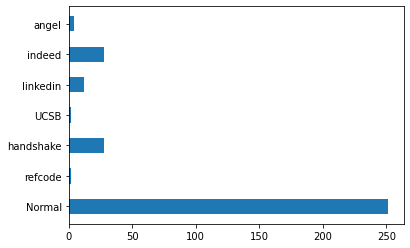

In [344]:
plt.hist(data4['Method'], bins=7, rwidth=.5, align='left', orientation='horizontal')

In [345]:
# Check if non normal applications have a higher initial response rate (Stage 1)
nnormal = data3['Method'] != 'Normal'
nnormal_data = data3.loc[nnormal]
normal = data3['Method'] == 'Normal'
normal_data = data3.loc[normal]
nnormal_data.head()
#normal_data.head()

,Term,Method,Reapply?,Cover,Account,Date Applied,ResVer,Company,Title,Stack,Date Replied,Stage 1,Stage 2,Stage 3,HighestStage
53,2021 Summer,refcode,no,req,linkedin,2021-01-06,4.0,TikTok,MLEI,AI,NaT,0.0,NaN,NaN,0.0
54,2021 Summer,refcode,no,req,linkedin,2021-01-06,4.0,TikTok,SEI- Site Reliability,Testing,NaT,0.0,NaN,NaN,0.0
59,2021 Summer,handshake,yes,no,yes,2021-01-13,6.0,Stout,(DEI) AI Digital Transformation Full Stack,AI,2021-03-19,2.0,0.0,NaN,2.0
62,2021 Summer,handshake,No,no,none,2021-01-13,6.0,Beyond Limits,SEI,Unclear,2021-01-22,1.0,NaN,NaN,1.0
67,2021 Summer,handshake,no,no,yes,2021-01-13,6.0,Handshake,SEI- Full-Stack,JS,NaT,0.0,NaN,NaN,0.0


In [346]:
nnormal_chart = alt.Chart(nnormal_data).mark_bar().encode(
    alt.X('count()'),
    alt.Y('HighestStage'),
    color = 'Method'
).properties(
    height=200,
    width=720
)
normal_chart = alt.Chart(normal_data).mark_bar().encode(
    alt.X('count()'),
    alt.Y('HighestStage'),
    color = 'Method'
).properties(
    height=200,
    width=720
)

nnormal_chart & normal_chart

alt.VConcatChart(...)

* seems to be a higher rate of ghosting on quick apply methods
* higher rate of assessments from normal
* higher rate of interviews from quick apply

## Are *accounts* for *non-Reapply* companies worth it?

* Percentage of account-based apps with an initial response

In [445]:
# plt.hist(data4['Account'], bins=6, rwidth=.5, align='left', orientation='horizontal')
len(data3[data3['Account']!='none'])/len(data3)
# Proportion of apps that need accounts:

0.19877675840978593

In [446]:
# Proportion of reapply apps that need accounts:
len(data3[(data3['Account'] != 'none') & (data3['Reapply?'] != 'no')])/len(data3)

0.07339449541284404

In [348]:
acc_yes_reapply_no = (data3['Account']  == 'yes') & (data3['Reapply?'] == 'no')
small_account = data3.loc[acc_yes_reapply_no]
small_account.head()

,Term,Method,Reapply?,Cover,Account,Date Applied,ResVer,Company,Title,Stack,Date Replied,Stage 1,Stage 2,Stage 3,HighestStage
2,2021 Summer,Normal,no,no,yes,2020-10-26,1.0,Riot Games,Software Engineer Intern,C++,2020-10-27,1.0,NaN,NaN,1.0
11,2021 Summer,Normal,no,no,yes,2020-11-10,1.0,LinkedIn,SEi,Unclear,NaT,0.0,NaN,NaN,0.0
43,2021 Summer,Normal,no,no,yes,2021-01-02,4.0,(HP) Hewlett Packard Enterprise,SEI,Unclear,2021-02-16,1.0,NaN,NaN,1.0
51,2021 Fall,Normal,no,no,yes,2021-01-02,4.0,Tesla,SEI,Unclear,NaT,0.0,NaN,NaN,0.0
61,2021 Summer,Normal,no,no,yes,2021-01-13,6.0,salesforce,Data Engineer- Intelligence,Cloud,2021-02-02,1.0,NaN,NaN,1.0


In [349]:
alt.Chart(small_account).mark_bar().encode(
    alt.X('count()'),
    alt.Y('HighestStage')
)

alt.Chart(...)

In [350]:
# IRR of (Reapply=no and Account=yes )
small_account_ir = small_account['HighestStage'] >= 2
small_account_ir.mean()

0.029411764705882353

In [431]:
# IRR of (Reapply=yes and Account=yes)
big_account_irr = (data3['Reapply?'] != 'no') & (data3['Account'] == 'yes') & (data3['IR'] == True)
big_account_irr.mean()

0.009174311926605505

Overall IRR from reapply companies:

In [351]:
big_irr = (data3['Reapply?'] != 'no') & (data3['HighestStage'] >= 2)
big_irr.mean()

0.024464831804281346

In [352]:
small_irr = (data3['Reapply?'] == 'no') & (data3['HighestStage'] >= 2)
small_irr.mean()

0.05504587155963303

## Does a required *cover letter* or my automatic cover leter affect rates?


In [353]:
req_cover = (data3['Cover'] == 'req') & (data3['HighestStage'] >= 2)
print("Required: ", req_cover.mean())
yes_cover = (data3['Cover'] == 'yes') & (data3['HighestStage'] >= 2)
print("Yes: ", yes_cover.mean())
no_cover = (data3['Cover'] == 'no') & (data3['HighestStage'] >= 2)
print("No: ", no_cover.mean())

Required:  0.012232415902140673
Yes:  0.0061162079510703364
No:  0.06116207951070336


In [361]:
data3.loc[data3['Account'] != 'none']

,Term,Method,Reapply?,Cover,Account,Date Applied,ResVer,Company,Title,Stack,Date Replied,Stage 1,Stage 2,Stage 3,HighestStage
0,2021 Summer,Normal,yes,req,yes,2020-10-26,1.0,Google,SWE STEP First-Year,Core,2021-02-23,1.0,NaN,NaN,1.0
1,2021 Summer,Normal,yes,req,yes,2020-10-26,1.0,Google,SWE STEP Second-Year,Core,2021-01-06,1.0,NaN,NaN,1.0
2,2021 Summer,Normal,no,no,yes,2020-10-26,1.0,Riot Games,Software Engineer Intern,C++,2020-10-27,1.0,NaN,NaN,1.0
5,2021 Summer,Normal,yes,no,yes,2020-11-04,1.0,Microsoft,SEi,Core,2021-01-07,1.0,NaN,NaN,1.0
11,2021 Summer,Normal,no,no,yes,2020-11-10,1.0,LinkedIn,SEi,Unclear,NaT,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2021 Summer,Normal,yes,req,yes,2021-02-27,9.0,DreamWorks- NBC Universal,SEI- R&D,Core,NaT,0.0,NaN,NaN,0.0
239,2021 Summer,Normal,yes,no,yes,2021-02-27,9.0,Pearson,Data Modeler Engineer Intern,DS,NaT,0.0,NaN,NaN,0.0
247,2021 Summer,Normal,no,no,yes,2021-03-09,9.0,PluralSight,SEI,Core,2021-03-18,1.0,NaN,NaN,1.0
255,2021 Summer,Normal,no,no,yes,2021-03-09,9.0,Bristol Myers Squibb,Statistical Programming Intern,Core,NaT,0.0,NaN,NaN,0.0


In [365]:
# cover req + account + non reapply company (waste of time?)
cover_account_irr = (data3['Reapply?'] == 'no') & (data3['Cover'] == 'req') & (data3['Account'] != 'none') & (data3['HighestStage'] >= 2)
print("Cover Account IRR: ", cover_account_irr.mean())
print("Sample size: ", len(data3.loc[cover_account_irr]))
# No Data.
# Probably a waste of time then.

Cover Account IRR:  0.0
Sample size:  0


In [440]:
# IRR of (Reapply=yes and Account=yes and Cover=yes)
big_account_irr = (data3['Cover'] != 'no') & (data3['Reapply?'] != 'no') & (data3['Account'] != 'none') & (data3['IR'] == True)
big_account_irr.mean()

0.0061162079510703364

## Do I seem more qualified for a certain stack?

In [356]:
alt.Chart(data3).mark_bar().encode(
    alt.X('count()'),
    alt.Y('HighestStage'),
    color='Stack'
)

alt.Chart(...)

## Reponse vs Time

In [426]:
# Grouped Bar Chart
# Date Replied vs ResVer, colored by IR
# Lifetime of each resume and when responses were obtained
alt.Chart(data3).mark_circle().encode(
    alt.X('Date Replied:T'),
    alt.Y('ResVer:N', title='Resume Version'),
    color = 'IR'
)

alt.Chart(...)

In [425]:
# Proportion of ResVer
# ResVer Histogram separated by IR
alt.Chart(data3).mark_bar().encode(
    alt.X('ResVer:N', title='Resume Version'),
    alt.Y('count()', title='Number of Applications'),
    color = 'IR'
)

alt.Chart(...)

In [419]:
# Actual Proportions:
# figure out a way to automate this?

def resver_mean(ver_num: int) -> float:
    resver = data3.loc[data3['ResVer'] == ver_num]
    print('Ver ', ver_num, ': ', resver['IR'].mean())
    return resver.mean()


print('IRR by major Resume Version:')
for i in range(1, 10):
    resver_mean(i)

IRR by major Resume Version:
Ver  1 :  0.0
Ver  2 :  0.0
Ver  3 :  nan
Ver  4 :  0.0
Ver  5 :  nan
Ver  6 :  0.08695652173913043
Ver  7 :  0.0625
Ver  8 :  0.10619469026548672
Ver  9 :  0.10204081632653061
<ipython-input-419-5b27a140bd20>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return resver.mean()
<ipython-input-419-5b27a140bd20>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return resver.mean()
<ipython-input-419-5b27a140bd20>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return resver.mean()
<ipython-input-419-5b27a140bd20>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ret

## Success of IR

# 4. Takeaways


# 5. Improvements for data collection

* the entire job description
* don't need to collect Term Data (date applied + job title, is enough information)
* have a column for referrals